## loan prediction

### import libraries and load data

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import NuSVC, LinearSVC, SVC


pd.pandas.set_option('display.max_columns',14)

In [298]:
#load datasets
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [299]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## handling null values

#### train

In [300]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [301]:
train.shape

(614, 13)

In [302]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [303]:
#filling train null values
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [304]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### test

In [305]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [306]:
test.shape

(367, 12)

In [307]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [308]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])

test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [309]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## EDA

In [310]:
train1 = train.copy()

In [311]:
train1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [312]:
train1['Loan_Status'] = train1['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [313]:
train1.shape

(614, 13)

In [314]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [315]:
#checking no. of unique values
print(len(train1.Credit_History.unique()))
print(len(train1.Loan_Amount_Term.unique()))

2
10


In [316]:
#these feature has very less no. of unique value 
#we make them categorical feature
train1 = train1.astype({'Loan_Amount_Term':'object','Credit_History':'object'})
test = test.astype({'Loan_Amount_Term':'object','Credit_History':'object'})

#### analysis on categorical feature

In [317]:
#print categorical feature
categorical_feature = [X for X in train1.columns if train1[X].dtype == 'object']
categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

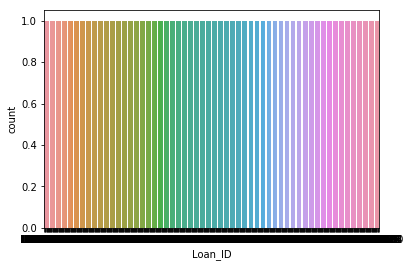

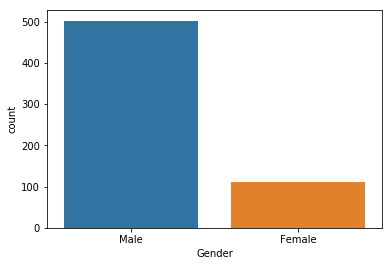

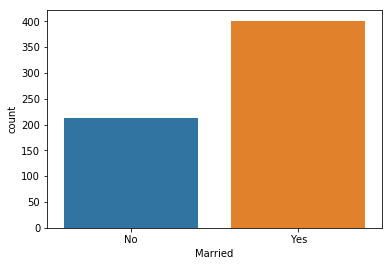

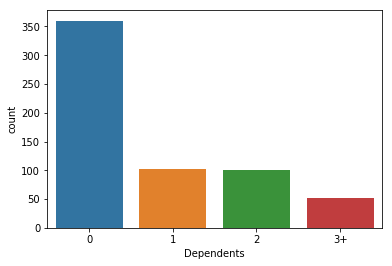

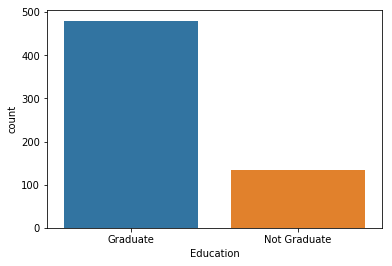

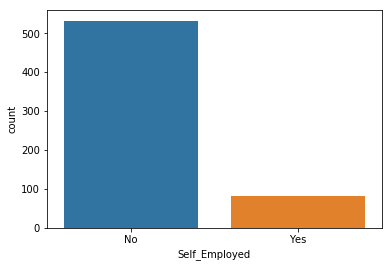

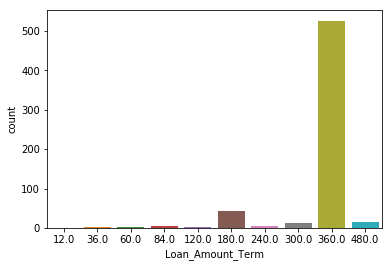

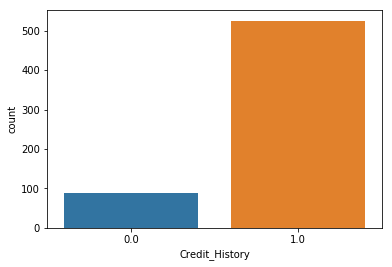

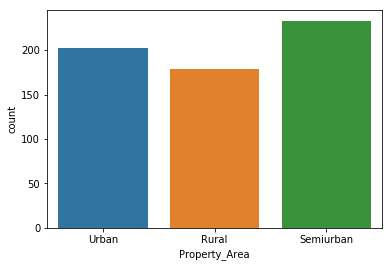

In [318]:
#visualize count plot
for feature in categorical_feature:
    sns.countplot(x=train1[feature])
    plt.show()

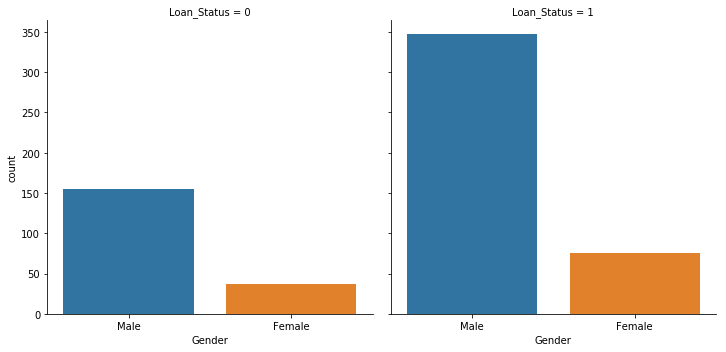

In [319]:
#Loan_Status of male is 'Y' more likely to female
sns.catplot(x='Gender', col='Loan_Status', kind='count', data = train1)

In [320]:
categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [321]:
cat_feature = [e for e in categorical_feature if e not in ['Loan_ID','Gender','Loan_Amount_Term','Loan_Status']]
cat_feature

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

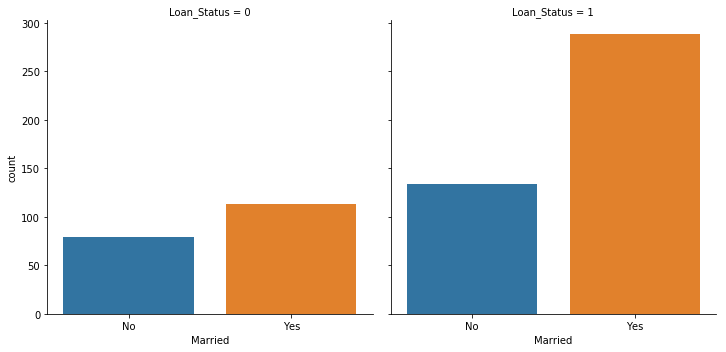

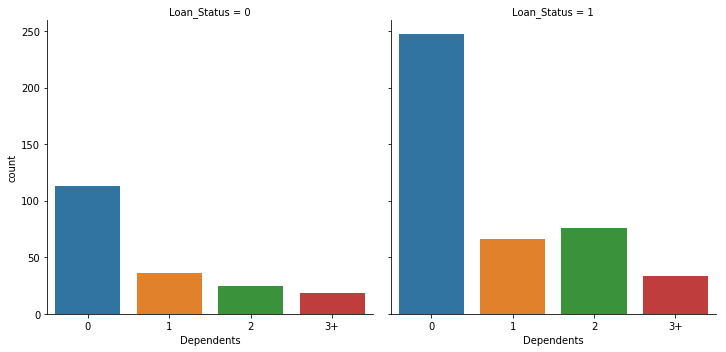

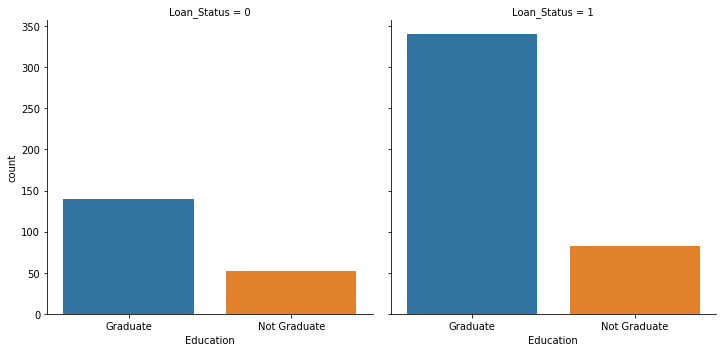

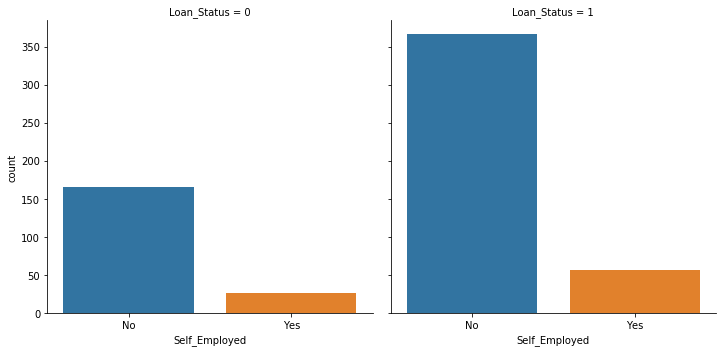

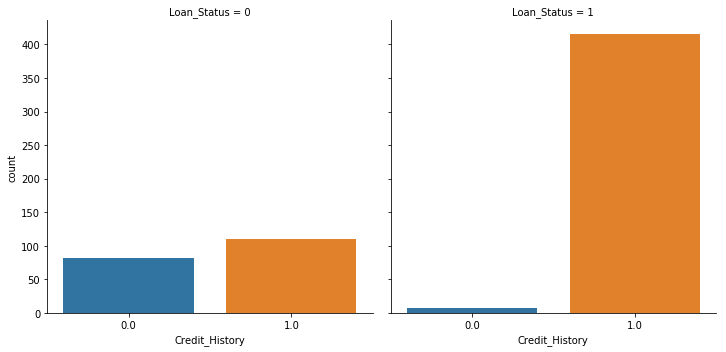

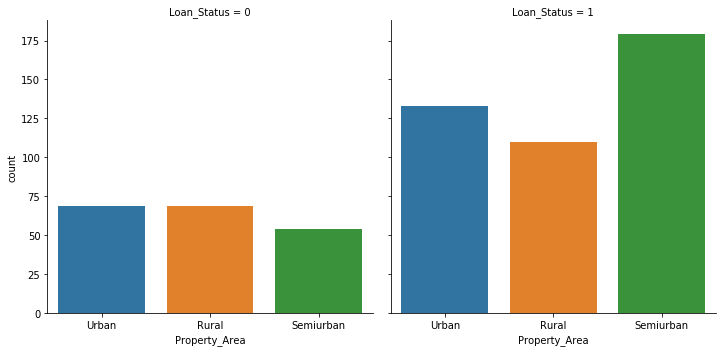

In [322]:
for feature in cat_feature:
    sns.catplot(x=feature, col='Loan_Status', kind='count', data=train1)
    plt.show()

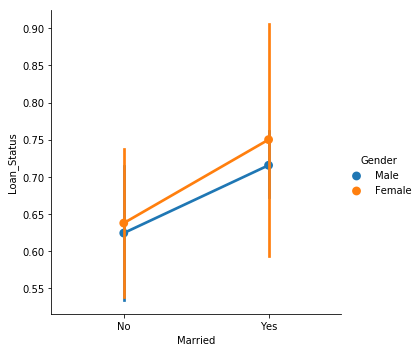

In [323]:
#loan_status of female is better than male in both condition married or unmarried
#loan_status of female and male both better in case of married
sns.catplot('Married', 'Loan_Status', hue='Gender', kind='point', data=train1)

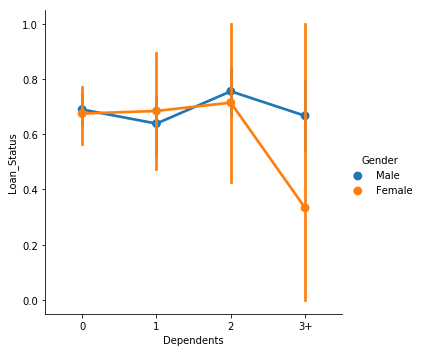

In [324]:
#loan_status of female in case of 3+ is not good
sns.catplot('Dependents','Loan_Status', hue='Gender', kind='point', data=train1)

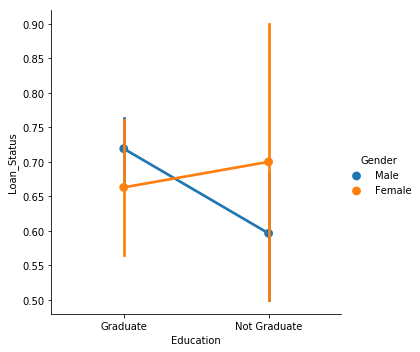

In [325]:
#loan_status of female is average but in case of not graduate is good compare to graduate
sns.catplot('Education','Loan_Status', hue='Gender', kind='point', data=train1)

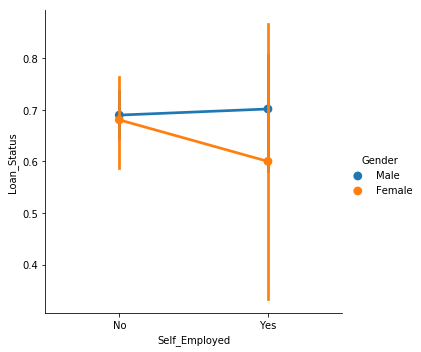

In [326]:
#male is better here
sns.catplot('Self_Employed','Loan_Status', hue='Gender', kind='point', data=train1)

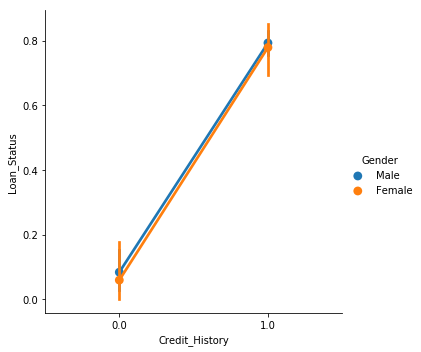

In [327]:
#loan_status of male and female is better if credit_history == 1 else worst
sns.catplot('Credit_History','Loan_Status',hue='Gender', kind='point',data=train1)

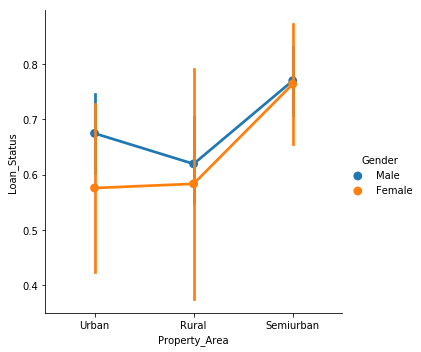

In [328]:
#loan_status of male and female are better in case of Semiurban
sns.catplot('Property_Area','Loan_Status',hue='Gender',kind='point', data=train1)

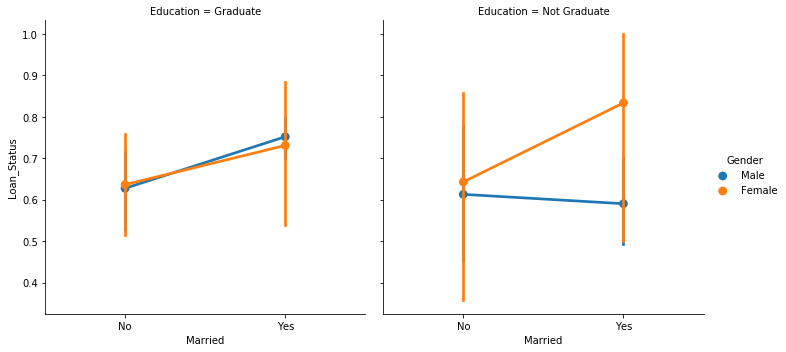

In [329]:
sns.catplot('Married','Loan_Status',col='Education',hue='Gender',kind='point',data=train1)

#### numerical feature

In [330]:
numerical_feature = [X for X in train1.columns if X not in categorical_feature]
numerical_feature.remove('Loan_Status')
numerical_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [331]:
def diagnostic_plots(df, var):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.distplot(df[var], hist=True)
    plt.subplot(1,2,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.show()

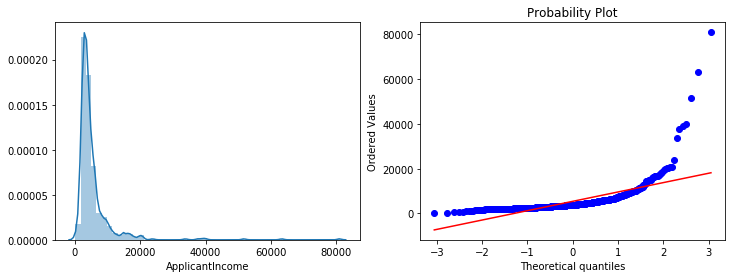

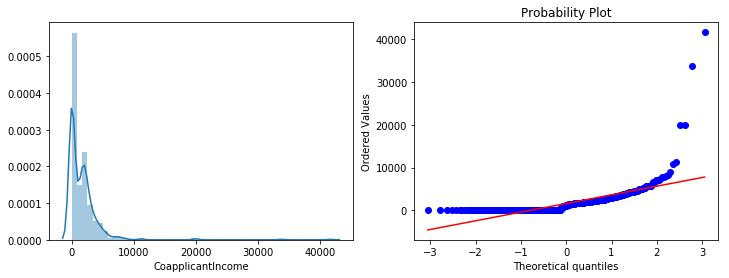

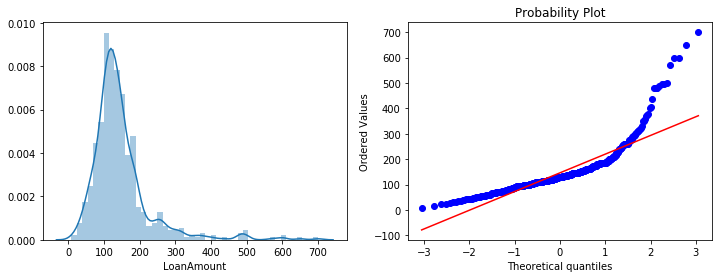

In [332]:
#histogram
for feature in numerical_feature:
    diagnostic_plots(train1, feature)

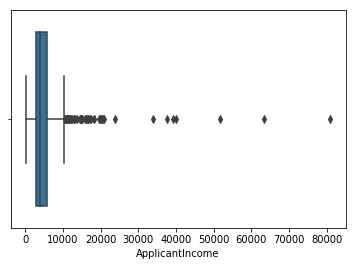

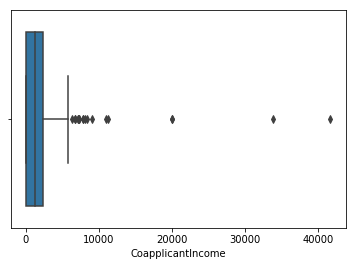

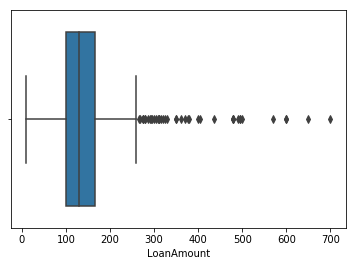

In [333]:
#numerical feature box plot visualization
for feature in numerical_feature:
    sns.boxplot(x=train1[feature])
    plt.show()

In [334]:
categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [335]:
print('no of unique value in each feature')
for feature in categorical_feature:
    print('{} = {}'.format(feature, len(train1[feature].unique())))

no of unique value in each feature
Loan_ID = 614
Gender = 2
Married = 2
Dependents = 4
Education = 2
Self_Employed = 2
Loan_Amount_Term = 10
Credit_History = 2
Property_Area = 3


In [336]:
train1.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [337]:
train1.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [338]:
train1 = train1[(train1.Loan_Amount_Term > 120) & (train1.Loan_Amount_Term != 240)]

In [339]:
train1.shape

(598, 13)

In [340]:
train1.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
Name: Loan_Amount_Term, dtype: int64

#### numerical feature

In [341]:
#statistical thiniking over numerical feature
train1[['ApplicantIncome', 'CoapplicantIncome']].corr('spearman')

,ApplicantIncome,CoapplicantIncome
ApplicantIncome,1.000000,-0.319586
CoapplicantIncome,-0.319586,1.000000


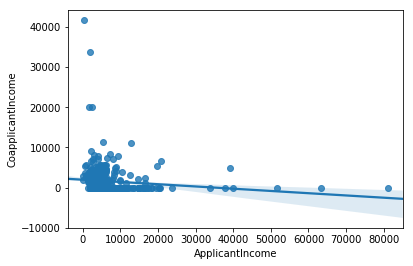

In [342]:
sns.regplot(x='ApplicantIncome', y='CoapplicantIncome', data=train1)

In [343]:
#correlation between ApplicantIncome and LoanAmount
train1[['ApplicantIncome', 'LoanAmount']].corr('spearman')

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.504587
LoanAmount,0.504587,1.000000


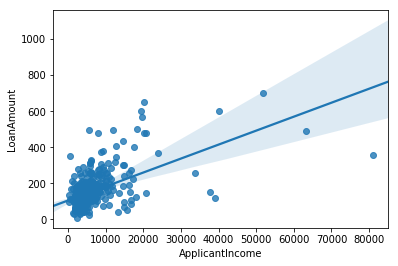

In [344]:
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=train1)

In [345]:
train1[['CoapplicantIncome', 'LoanAmount']].corr('spearman')

,CoapplicantIncome,LoanAmount
CoapplicantIncome,1.000000,0.228095
LoanAmount,0.228095,1.000000


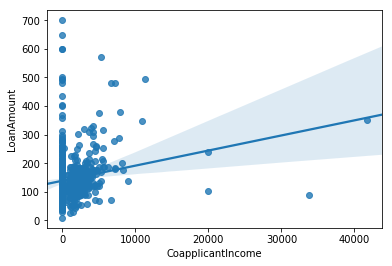

In [346]:
sns.regplot(x='CoapplicantIncome',y='LoanAmount', data=train1)

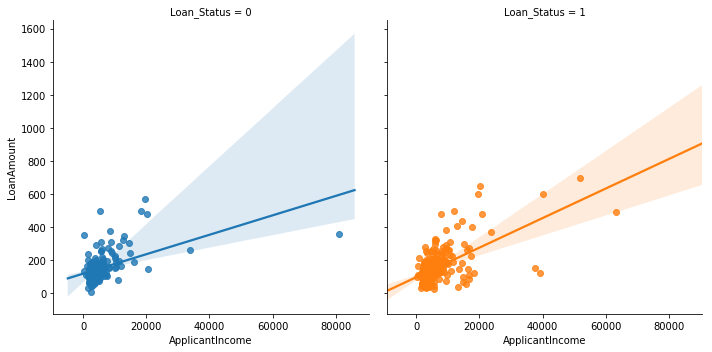

In [347]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data=train1,fit_reg=True,
           col='Loan_Status',hue='Loan_Status')

In [348]:
train1[train1['Loan_Status'] == 0][['ApplicantIncome','LoanAmount']].corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.481878
LoanAmount,0.481878,1.000000


In [349]:
train1[train1['Loan_Status'] == 1][['ApplicantIncome','LoanAmount']].corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.00000,0.61509
LoanAmount,0.61509,1.00000


I am looking for r_value, if r_value but r_value are not same in both pair.

In [350]:
#now we want to explore more in terms of statics
slope, intercept, r_value, p_value, std_err = stats.linregress(train1['ApplicantIncome'],
                                                              train1['LoanAmount'])
print('slope = ',slope)
print('intercept = ', intercept)
print('p_value = ', p_value)
print('std_err = ', std_err)
print('r_value = ',r_value)

slope =  0.007742651153867489
intercept =  105.39810041341516
p_value =  4.485005735685813e-52
std_err =  0.0004612368419229221
r_value =  0.5665907142436786


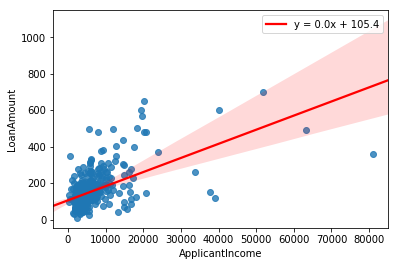

In [351]:
ax= sns.regplot(x='ApplicantIncome', y='LoanAmount', data=train1,
                line_kws={'color':'red','label':'y = {0:.1f}x + {1:.1f}'
                         .format(slope, intercept)})
ax.legend()

In [352]:
slope, intercept, r_value, p_value, std_err = stats.linregress(train1['CoapplicantIncome'],
                                                              train1['LoanAmount'])
print('slope = ',slope)
print('intercept = ', intercept)
print('p_value = ', p_value)
print('std_err = ', std_err)
print('r_value = ',r_value)

slope =  0.005282266631587423
intercept =  138.7784226331234
p_value =  5.512544056203401e-06
std_err =  0.001151856651963776
r_value =  0.18461571554725711


## outlier removal

In [235]:
train2 = train1.copy()

In [236]:
# z = (observation - mean) / std

def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z = (i - mean)/std
        if np.abs(z) > threshold:
            outliers.append(i)
    return outliers

In [237]:
#ApplicantIncome Outlier
ApplicantIncome_ol = detect_outliers(train2.ApplicantIncome)
print('len of ApplicantIncome_ol = ',len(ApplicantIncome_ol))
ApplicantIncome_ol

len of ApplicantIncome_ol =  7


[39999, 51763, 33846, 39147, 63337, 81000, 37719]

In [238]:
np.sort(ApplicantIncome_ol)

array([33846, 37719, 39147, 39999, 51763, 63337, 81000])

In [239]:
#remove ApplicantIncome Outlier
train2 = train2[train2.ApplicantIncome < 23803]

In [240]:
#CoapplicantIncome outlier
coapplicantincome = detect_outliers(train2.CoapplicantIncome)
print('len of CoapplicantIncome outlier = ',len(coapplicantincome))
coapplicantincome

len of CoapplicantIncome outlier =  6


[10968.0, 11300.0, 20000.0, 20000.0, 33837.0, 41667.0]

In [241]:
np.sort(coapplicantincome)

array([10968., 11300., 20000., 20000., 33837., 41667.])

In [242]:
#remove CoapplicantIcome outlier
train2 = train2[train2.CoapplicantIncome < 10968]

In [243]:
#LoanAmount outlier
loanamount = detect_outliers(train2.LoanAmount)
print('len of LoanAmount outlier = ',len(loanamount))
print(loanamount)

len of LoanAmount outlier =  13
[650.0, 436.0, 480.0, 376.0, 570.0, 380.0, 405.0, 500.0, 480.0, 480.0, 400.0, 600.0, 496.0]


In [244]:
np.sort(loanamount)

array([376., 380., 400., 405., 436., 480., 480., 480., 496., 500., 570.,
       600., 650.])

In [245]:
train2 = train2[train2.LoanAmount < 376]

In [246]:
train2.shape

(571, 13)

## feature selection

In [353]:
train3 = train1.copy()

### checking the strength of categorical features

- Null Hypothesis =  there is no relationship between two categorical variables
- Alternate Hypothesis = there is a relationship between categorical variables

using chi2 test we just find the relationship between categorical variable. chi2 test just show the significance of the relationship but it does not shows the strength of relationship.
and cramer v test just show the strength of realtion ship between two categorical variable.
- chi2 = sum((Oberved - Expected)^2 / Expected) 
    - we will try to go and do statistical test to prove that there is a relationship or not 
    - the more higher value of chi2 shows the more possibility of relationship.
- if p is less than 0.05 then it shows the significant relationship
- cramer v test = sqrt(chi2/(n*(min(C,R)-1))
    - cramer v test is the number between 0 and 1, more closer to 1 value shows the strong relationship

In [354]:
print(categorical_feature)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [355]:
categorical_feature.remove('Loan_ID')
print(categorical_feature)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [356]:
for i in categorical_feature:
    ct = pd.crosstab(index=train3[i], columns=train3['Loan_Status'])
    (chi2, p, dof,_) = stats.chi2_contingency([ct.iloc[0].values, ct.iloc[1].values])
    print(i,':--------------')
    print('chi2 test : ', chi2)
    print('p : ',p)
    print('dof : ',dof)
    print('cramer v test : ',np.sqrt(chi2/(train3.shape[0])))
    print('')

Gender :--------------
chi2 test :  0.07906041626864455
p :  0.7785747661304865
dof :  1
cramer v test :  0.011498176114538516

Married :--------------
chi2 test :  4.220462452430373
p :  0.0399392740077021
dof :  1
cramer v test :  0.08400969895859844

Dependents :--------------
chi2 test :  0.26423484439710176
p :  0.6072255735315489
dof :  1
cramer v test :  0.021020568219947525

Education :--------------
chi2 test :  4.229260436487343
p :  0.03973274998778917
dof :  1
cramer v test :  0.08409721676152958

Self_Employed :--------------
chi2 test :  3.2325722193391935e-05
p :  0.9954635947976092
dof :  1
cramer v test :  0.00023250030457559772

Loan_Amount_Term :--------------
chi2 test :  0.0016496172746172807
p :  0.9676024425055454
dof :  1
cramer v test :  0.0016608905187921066

Credit_History :--------------
chi2 test :  175.42333051515064
p :  4.839079972945681e-40
dof :  1
cramer v test :  0.5416179936345172

Property_Area :--------------
chi2 test :  11.236318643848549
p :  0

### checking strength of numerical data using one_way_anova

In [357]:
#ApplicantIncome
loanstatus = train3.Loan_Status.unique()
data = {grp:train3['ApplicantIncome'][train3.Loan_Status == grp] for grp in loanstatus}


In [358]:
f, p = stats.f_oneway(data[1], data[0])
print('f = ',f)
print('p = ', p)

f =  0.011462902660417168
p =  0.9147734851337481


In [359]:
#CoapplicantIncome
data = {grp:train3['CoapplicantIncome'][train3.Loan_Status == grp] for grp in loanstatus}
f, p = stats.f_oneway(data[1], data[0])
print('f = ',f)
print('p = ', p)

f =  2.1422310090712338
p =  0.1438205586294468


In [360]:
#LoanAmount
data = {grp:train3['LoanAmount'][train3.Loan_Status == grp] for grp in loanstatus}
f, p = stats.f_oneway(data[1], data[0])
print('f = ',f)
print('p = ',p)

f =  0.4583660246021534
p =  0.4986512924639712


In [386]:
train3 = train3.drop(['Self_Employed','Loan_Amount_Term'], axis=1)
testx = test.drop(['Self_Employed','Loan_Amount_Term'], axis=1)

## feature engineering and split data

In [387]:
train4 = train3.copy()
test1 = testx.copy()

In [388]:
categorical_feature = [feature for feature in train4.columns if train4[feature].dtype == 'object' ]
numerical_feature = [feature for feature in train4.columns if feature not in categorical_feature]

In [389]:
train4.head()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,5849,0.0,146.412162,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,128.000000,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,3000,0.0,66.000000,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,120.000000,1,Urban,1
4,LP001008,Male,No,0,Graduate,6000,0.0,141.000000,1,Urban,1


In [390]:
train4 = pd.get_dummies(train4, columns=['Gender', 'Dependents','Married','Education','Credit_History','Property_Area'], drop_first=True)
train4 = train4.drop('Loan_ID', axis=1)

In [391]:
train4.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Dependents_1,Dependents_2,Dependents_3+,Married_Yes,Education_Not Graduate,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,1,1,0,0,0,0,0,1,0,1
1,4583,1508.0,128.000000,0,1,1,0,0,1,0,1,0,0
2,3000,0.0,66.000000,1,1,0,0,0,1,0,1,0,1
3,2583,2358.0,120.000000,1,1,0,0,0,1,1,1,0,1
4,6000,0.0,141.000000,1,1,0,0,0,0,0,1,0,1


In [392]:
categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Credit_History',
 'Property_Area']

In [393]:
numerical_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']

In [394]:
#creting dummies feature and drop original feature
test1 = pd.get_dummies(test1, columns=['Gender', 'Dependents','Married','Education','Credit_History','Property_Area'], drop_first=True)
test1 = test1.drop('Loan_ID', axis=1)

In [395]:
#print shape
print(train4.shape)
print(test1.shape)

(598, 13)
(367, 12)


#### feature scaling

In [396]:
feature_scale = [feature for feature in train4.columns if feature != 'Loan_Status']
scaler = MinMaxScaler()
scaler.fit(train4[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [397]:
scale = scaler.transform(train4[feature_scale])

In [398]:
# transform the train and test set, and add on the Loan_Status variables
train4 = pd.concat([train4['Loan_Status'].reset_index(drop = True),
                   pd.DataFrame(scale, columns = feature_scale)], axis=1)

In [399]:
train4.head()

,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Dependents_1,Dependents_2,Dependents_3+,Married_Yes,Education_Not Graduate,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,1,0.070489,0.000000,0.198860,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,0.054830,0.036192,0.172214,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0.035250,0.000000,0.082489,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1,0.030093,0.056592,0.160637,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,1,0.072356,0.000000,0.191027,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [400]:
c = [c for c in test1.columns if c not in train4.columns]
c

[]

In [401]:
test1 = test1.drop(c, axis=1)
print(test1.shape)

(367, 12)


In [402]:
b = [b for b in train4.columns if b not in test1.columns]
b

['Loan_Status']

In [403]:
x = train4.drop('Loan_Status', axis=1)
y = train4.Loan_Status
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## Model building

#### Logistic Regression

In [404]:
logr_model = LogisticRegression()
logr_model.fit(x_train, y_train)
logr_model.score(x_test, y_test)

0.8055555555555556

In [405]:
print(metrics.confusion_matrix(y_test, logr_model.predict(x_test)))
print(metrics.classification_report(y_test, logr_model.predict(x_test)))

[[ 29  28]
 [  7 116]]
              precision    recall  f1-score   support

           0       0.81      0.51      0.62        57
           1       0.81      0.94      0.87       123

    accuracy                           0.81       180
   macro avg       0.81      0.73      0.75       180
weighted avg       0.81      0.81      0.79       180



#### Random Forest Classifier

In [406]:
rfc_model = RandomForestClassifier(
criterion='gini',
n_estimators=1100,
max_depth=5,
min_samples_split=4,
min_samples_leaf=5,
max_features='auto',
oob_score=True,

n_jobs=-1,
verbose=1
)

rfc_model.fit(x_train, y_train)
rfc_model.score(x_test,y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.8s finished


0.8333333333333334

In [407]:
print(metrics.confusion_matrix(y_test, rfc_model.predict(x_test)))
print(metrics.classification_report(y_test, rfc_model.predict(x_test)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.6s finished


[[ 29  28]
 [  2 121]]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s


              precision    recall  f1-score   support

           0       0.94      0.51      0.66        57
           1       0.81      0.98      0.89       123

    accuracy                           0.83       180
   macro avg       0.87      0.75      0.77       180
weighted avg       0.85      0.83      0.82       180



[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.6s finished


#### DecisionTreeClassifier

In [276]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)
dtc_model.score(x_test, y_test)

0.7790697674418605

In [277]:
print(metrics.confusion_matrix(y_test, dtc_model.predict(x_test)))
#print(metrics.classification_report(y_test, logr_model.predict(x_test)))

[[ 34  16]
 [ 22 100]]


#### SVM

In [278]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_model.score(x_test, y_test)

0.8430232558139535

In [279]:
print(metrics.confusion_matrix(y_test, svc_model.predict(x_test)))

[[ 26  24]
 [  3 119]]


In [280]:
nusvc_model = NuSVC()
nusvc_model.fit(x_train, y_train)
nusvc_model.score(x_test, y_test)

0.8430232558139535

In [281]:
print(metrics.confusion_matrix(y_test, nusvc_model.predict(x_test)))

[[ 26  24]
 [  3 119]]


In [282]:
lsvc_model = LinearSVC()
lsvc_model.fit(x_train, y_train)
lsvc_model.score(x_test, y_test)

0.813953488372093

In [283]:
print(metrics.confusion_matrix(y_test, lsvc_model.predict(x_test)))

[[ 26  24]
 [  8 114]]


In [284]:
print(len(y_test))
print('1 = ',np.sum(y_test))
print('0 = ', 172-117)

172
1 =  122
0 =  55


### submission file

In [285]:
print(XXX)

NameError: name 'XXX' is not defined

In [408]:
u = rfc_model.predict(test1)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.7s finished


In [409]:
u = pd.DataFrame(u)
r = pd.concat([test.Loan_ID, u], axis=1)
r.head()

,Loan_ID,0
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [410]:
r.to_csv('sub4.csv')

In [411]:
pd.read_csv('sub4.csv').Loan_Status.value_counts()

1    270
0     97
Name: Loan_Status, dtype: int64